In [1]:
import numpy as np
import pylab
#import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sys import stdout
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

In [2]:
data = pd.read_csv('hcc-data-complete-balanced.csv') #cargamos tabla
data

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.70,1,3.5,0.50,52.5,37.0,856.0,1
1,0,0,0,0,0,0,1,1,0,1,...,120,7.0,0.58,1,1.8,0.85,32.0,10.0,18.0,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7.0,2.10,5,13.0,0.10,28.0,6.0,16.0,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.20,131.0,78.0,1316.0,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.80,1,9.0,0.10,59.0,15.0,22.0,1
5,1,0,1,0,0,0,0,1,0,1,...,396,5.6,0.90,1,10.0,1.40,53.0,22.0,111.0,0
6,1,0,0,0,0,1,1,1,0,0,...,211,7.3,0.80,5,2.6,2.19,171.0,126.0,1452.0,0
7,1,1,1,0,0,0,0,1,0,1,...,300,7.1,0.52,2,9.0,1.30,42.0,25.0,706.0,0
8,1,1,1,0,0,0,0,1,0,1,...,63,6.1,0.59,1,6.4,1.20,85.0,73.0,982.0,1
9,1,1,1,0,0,0,0,1,0,0,...,303,7.1,0.59,1,9.3,0.70,37.0,11.0,173.0,1


In [3]:
X = data.drop(['Class'], axis=1) 
y=data['Class']
#x_train, x_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)

## Kaplan Meier

In [32]:
from lifelines import KaplanMeierFitter

Text(0, 0.5, 'Survival Probability')

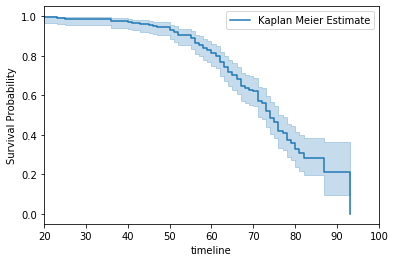

In [50]:
durations = data['Age'] ## Time to event data of censored and event data
event_observed = data['Class']  

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
km.plot()
plt.xlim(20,100)
plt.ylabel('Survival Probability')

### Lets create Kaplan Meier Curves for Cohorts


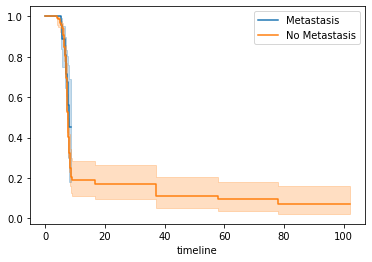

In [40]:
kmf = KaplanMeierFitter() 


T = data['TP']     ## time to event
E = data['Class']      ## event occurred or censored


groups = data['Metastasis']             ## Create the cohorts from the 'Metastasis' column
ix1 = (groups == 1)   ## Cohort 1
ix2 = (groups == 0)         ## Cohort 2



kmf.fit(T[ix1], E[ix1], label='Metastasis')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='No Metastasis')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)



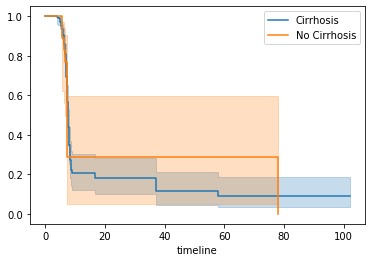

In [41]:
kmf = KaplanMeierFitter() 


T = data['TP']     ## time to event
E = data['Class']      ## event occurred or censored


groups = data['Cirrhosis']             ## Create the cohorts from the 'Cirrhosis' column
ix1 = (groups == 1)   ## Cohort 1
ix2 = (groups == 0)         ## Cohort 2



kmf.fit(T[ix1], E[ix1], label='Cirrhosis')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='No Cirrhosis')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


## Cox Proportional Hazard Model (Survival Regresion)

In [4]:
from lifelines import CoxPHFitter

In [43]:

# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(data, 'HBeAg', event_col='Class')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

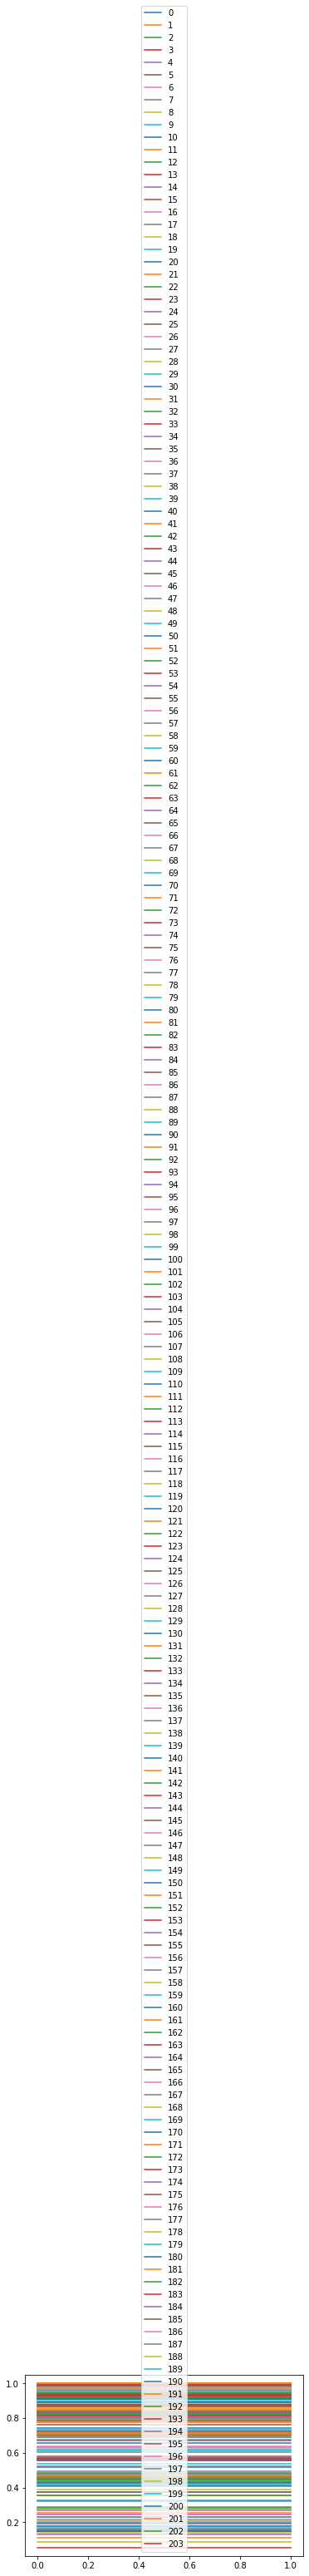

In [48]:
cph.predict_survival_function(data).plot()